Step 1: Zoom Function (Nearest + Bilinear)

In [7]:
import numpy as np

def zoom_image(img, scale, method="nearest"):
    h, w = img.shape
    new_h = int(h * scale)
    new_w = int(w * scale)

    zoomed = np.zeros((new_h, new_w), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            x = i / scale
            y = j / scale

            if method == "nearest":
                xi = min(int(round(x)), h - 1)
                yj = min(int(round(y)), w - 1)
                zoomed[i, j] = img[xi, yj]

            elif method == "bilinear":
                x0 = int(np.floor(x))
                y0 = int(np.floor(y))
                x1 = min(x0 + 1, h - 1)
                y1 = min(y0 + 1, w - 1)

                dx = x - x0
                dy = y - y0

                zoomed[i, j] = (
                    (1 - dx) * (1 - dy) * img[x0, y0] +
                    dx * (1 - dy) * img[x1, y0] +
                    (1 - dx) * dy * img[x0, y1] +
                    dx * dy * img[x1, y1]
                )
            else:
                raise ValueError("Unknown method")

    return np.uint8(zoomed)


def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    return np.sum((img1 - img2) ** 2) / np.sum(img1 ** 2)


Step 2: Load All 3 Image Pairs

In [8]:
import cv2
import os

small_images = [
    "../data/original/zoom/im01small.png",
    "../data/original/zoom/im02small.png",
    "../data/original/zoom/im03small.png"
]

large_images = [
    "../data/original/zoom/im01.png",
    "../data/original/zoom/im02.png",
    "../data/original/zoom/im03.png"
]

pairs = []

for s, l in zip(small_images, large_images):
    img_s = cv2.imread(s, cv2.IMREAD_GRAYSCALE)
    img_l = cv2.imread(l, cv2.IMREAD_GRAYSCALE)

    if img_s is None or img_l is None:
        raise FileNotFoundError(f"Error loading {s} or {l}")

    pairs.append((img_s, img_l))


Step 3: Process ALL 3 Pairs + Compute SSD

In [9]:
print("=== Normalized SSD Results ===\n")

for idx, (small, large) in enumerate(pairs, start=1):
    scale = large.shape[0] / small.shape[0]

    zoom_nn = zoom_image(small, scale, method="nearest")
    zoom_bl = zoom_image(small, scale, method="bilinear")

    ssd_nn = normalized_ssd(large, zoom_nn)
    ssd_bl = normalized_ssd(large, zoom_bl)

    print(f"Image Pair {idx}:")
    print(f"  Nearest Neighbor SSD : {ssd_nn:.6f}")
    print(f"  Bilinear SSD         : {ssd_bl:.6f}\n")


=== Normalized SSD Results ===

Image Pair 1:
  Nearest Neighbor SSD : 0.022004
  Bilinear SSD         : 0.017260

Image Pair 2:
  Nearest Neighbor SSD : 0.010439
  Bilinear SSD         : 0.007908



ValueError: operands could not be broadcast together with shapes (1459,2400) (1459,2398) 

Step 4 (Optional but Recommended): Show One Pair Visually

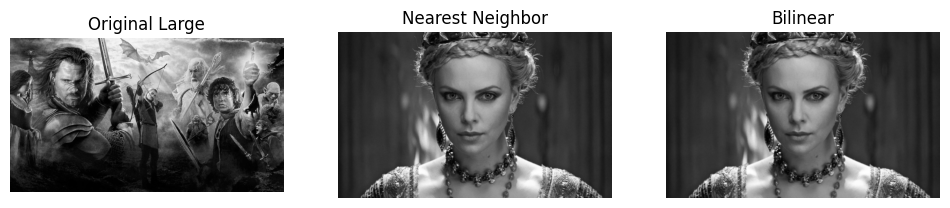

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(pairs[0][1], cmap='gray')
plt.title("Original Large")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(zoom_nn, cmap='gray')
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(zoom_bl, cmap='gray')
plt.title("Bilinear")
plt.axis("off")

plt.show()